In [6]:
from IPython.display import Image

# Implementing a Naive Bayes Text Classification System
## Overview
The purpose of assignment 3 is to classify hotel reviews as either Postive or Negative, using a naive Bayes approach. The performance of the system was evaluated based on a 20% DevTest sample (16 positive reviews, and 18 negative reviews). Precision, Recall, F-score and overall accuracy were used as evaluation metrics (where POS labels were considered as positive classifications; NEG labels were considered negative classifications). 

###  Bayes Theorem 
We are using the Bayes Theorem to answer the question: What is a probability of a category, given a document. So, in the equation below, x = category, and y = document. 


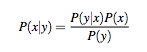

In [12]:
Image(filename ="/Users/amyburkhardt/Dropbox/Screenshots/nb.png")

The Bayes Theoroem can be further simplified for our purposes. First, we can remove the prior estimate P(x), because the probability of a review being either positive or negative in the test set will be .50. We can also remove the denominator from the equation, because this will be a constant.  Therefore, the final equation is as follows (adding together the log of the probabilities turns this into a linear classifier):

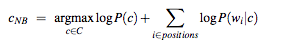

In [10]:
Image(filename = "/Users/amyburkhardt/Dropbox/Screenshots/nb2.png")

### Training the Classifier
To train the classifier, I created two separate dictionaries to store conditional probabilities, one for Positive reviews and one for Negative reviews. All words that are present in both the Negative and Positive training sets are present in both of these dictionaries as keys. Conditional probabilities were computed by the count of the word in the traning data for a particular category, divided by the total number of words in that category (see equation below). +1 smoothing has been applied here, in the event that a word appears only in the Positive or Negative training samples. Therefore, 1 is added to the numerator, and the total count of the length of all unique words present in the training sample are added to the denominator. 


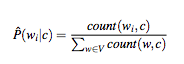

In [7]:
Image(filename = "/Users/amyburkhardt/Dropbox/Screenshots/nb3.png")

### Classifying New Reviews
After the classifier has been trained, the probability of the two categories (POS and NEG) are computed for each new review. That is, using one conditional probability dictionary at a time, I find the associated probabilties for all words in the new review. I then add all of these logprobs together,  and arrive at two different probability computations: (1) the probability of POS, given the reivew; and (2) the probability of NEG, given the review. 

These probabilities are then compared, and the category (POS or NEG) of the higher probability then is used to assign a label to the new review. 

Words that are in a new review, but were not in the training data, are disregarded when computing these probabilities.

No special libraries were used in the implementation of this naive Bayes classifier. 



## Evaluating performance 
Below are the performance metrics for the DevTest set (n=34). <p>

<b>Precision: .88 <p> 
TP / (TP + FP) (so, the more FP will decrase the Precision value) <p>
Recall: .94 <p>
TP / (TP + FN) (so, more FN will decrase the Recall value) <p>
Accuracy: .91 <p>
Accuracy = (TP + TN) / (TP + TN + FP + FN) <p>
F-score: .91 <p>
(Precision*Recall)/(Precision+Recall) <p>

## Appendix

### Code for Evaluating the DevTest set

In [4]:
pred = {}
with open("/Users/amyburkhardt/Dropbox/NLP Readings/hw 2/burkhardt-amy-assgn3-test-output.txt") as f:
    for line in f:
       (key, val) = line.split("\t")
       pred[key] = val.rstrip()
        
truth = {}
with open("/Users/amyburkhardt/Dropbox/NLP Readings/hw 2/eval_rand_neg_and_pos.txt") as f:
    for line in f:
       (key, val) = line.split("\t")
       truth[key] = val.rstrip()
        
TP = 0
TN = 0
FP = 0
FN = 0
for key, value in truth.items(): 
    if value == 'POS':
        if pred[key] == 'POS':
            TP += 1
        else:
            FN += 1
    if value == 'NEG':
        if pred[key] == 'NEG':
            TN += 1
        else: 
            FP +=1
print(TP, FP, TN, FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
Accuracy= (TP + TN) / (TP + TN + FP + FN)
F_score = 2*(Precision*Recall)/(Precision+Recall)

15 2 16 1


### Code for Dividing the Sample into Train and DevTest

In [ ]:
## Positive Reviews
keep_prob = .80

# path to the training output file
train_path = "/Users/amyburkhardt/Dropbox/NLP Readings/hw 2/hotelPosT-rand_training.txt"
# path to the testing output file
test_path = "/Users/amyburkhardt/Dropbox/NLP Readings/hw 2/rand_test_neg_and_pos.txt"

# path to the evaluation file (review_id and POS or NEG)
eval_path = "/Users/amyburkhardt/Dropbox/NLP Readings/hw 2/eval_rand_neg_and_pos.txt"

# open output files
train_f = open(train_path, 'w')
test_f = open(test_path, 'w')
eval_f = open(eval_path, 'w')


tkeep_count = 0
ttest_count = 0
teval_count = 0 
with open ("/Users/amyburkhardt/Dropbox/NLP Readings/hw 2/hotelPosT-train.txt") as pos: 

    for line in pos:
        line = line.rstrip('\n')
        review_id = re.split('\t',line)[0]
        if random() <= keep_prob:
            # write to train_corpus
            train_f.write(line+'\n')
            tkeep_count += 1
        else:
            # write to test_corpus
            test_f.write(line +'\n')
            ttest_count += 1
            eval_f.write(review_id+'\tPOS\n')
            teval_count += 1
            
    # close output files
    train_f.close()
    test_f.close()
    eval_f.close()

    # repor
    print("Wrote %d lines to %s" % (tkeep_count, train_path))
    print("Wrote %d lines to %s" % (ttest_count, test_path))
    print("Wrote %d lines to %s" % (teval_count, eval_path))
    
## Negative Reviews
keep_prob = .80

# path to the training output file
train_path = "/Users/amyburkhardt/Dropbox/NLP Readings/hw 2/hotelNegT-rand_training.txt"
# path to the testing output file
test_path = "/Users/amyburkhardt/Dropbox/NLP Readings/hw 2/rand_test_neg_and_pos.txt"
# path to the evaluation file (review_id and POS or NEG)
eval_path = "/Users/amyburkhardt/Dropbox/NLP Readings/hw 2/eval_rand_neg_and_pos.txt"

# open output files
train_f = open(train_path, 'w')
test_f = open(test_path, 'a')
eval_f = open(eval_path, 'a')



vkeep_count = 0
vtest_count = 0
veval_count = 0

with open ("/Users/amyburkhardt/Dropbox/NLP Readings/hw 2/hotelNegT-train.txt") as pos: 

    for line in pos:
        line = line.rstrip('\n')
        review_id = re.split('\t',line)[0]
        if random() <= keep_prob:
            # write to train_corpus
            train_f.write(line+'\n')
            vkeep_count += 1
        else:
            # write to test_corpus
            test_f.write(line +'\n')
            vtest_count += 1
            eval_f.write(review_id+'\tNEG\n')
            veval_count += 1
            
            
    # close output files
    train_f.close()
    test_f.close()
    eval_f.close()

    # report
    print("Wrote %d lines to %s" % (vkeep_count, train_path))
    print("Wrote %d lines to %s" % (vtest_count, test_path))
    print("Wrote %d lines to %s" % (veval_count, eval_path))